In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters

(data_train, labels_train), (data_test, labels_test) = reuters.load_data(num_words=10000)

data_train.shape, data_train[0]

((8982,),
 [1,
  2,
  2,
  8,
  43,
  10,
  447,
  5,
  25,
  207,
  270,
  5,
  3095,
  111,
  16,
  369,
  186,
  90,
  67,
  7,
  89,
  5,
  19,
  102,
  6,
  19,
  124,
  15,
  90,
  67,
  84,
  22,
  482,
  26,
  7,
  48,
  4,
  49,
  8,
  864,
  39,
  209,
  154,
  6,
  151,
  6,
  83,
  11,
  15,
  22,
  155,
  11,
  15,
  7,
  48,
  9,
  4579,
  1005,
  504,
  6,
  258,
  6,
  272,
  11,
  15,
  22,
  134,
  44,
  11,
  15,
  16,
  8,
  197,
  1245,
  90,
  67,
  52,
  29,
  209,
  30,
  32,
  132,
  6,
  109,
  15,
  17,
  12])

In [15]:
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [16]:
reverse_word_index = {value: key for key, value in word_index.items()}
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [17]:
decoded_text = ' '.join([reverse_word_index.get(i - 3, "?") for i in data_train[0]])
decoded_text

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

In [19]:
x_train = vectorize_sequences(data_train)
x_test = vectorize_sequences(data_test)

In [22]:
def one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [23]:
y_train = one_hot(labels_train)
y_test = one_hot(labels_test)
y_train.shape, y_train[0]

((8982, 46),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

Note that there is a built-in way to do this in Keras:

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)

y_test = to_categorical(test_labels)

In [24]:
x_val = x_train[6000:]
x_train = x_train[:6000]
y_val = y_train[6000:]
y_train = y_train[:6000]

In [25]:
from keras.models import Sequential

model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [30]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
12/12 [==============================] - 1s 34ms/step - loss: 0.1202 - accuracy: 0.9663 - val_loss: 1.1577 - val_accuracy: 0.7911
Epoch 2/20
12/12 [==============================] - 0s 22ms/step - loss: 0.0844 - accuracy: 0.9692 - val_loss: 1.2068 - val_accuracy: 0.7894
Epoch 3/20
12/12 [==============================] - 0s 23ms/step - loss: 0.0857 - accuracy: 0.9685 - val_loss: 1.2081 - val_accuracy: 0.7904
Epoch 4/20
12/12 [==============================] - 0s 24ms/step - loss: 0.0822 - accuracy: 0.9702 - val_loss: 1.2102 - val_accuracy: 0.7891
Epoch 5/20
12/12 [==============================] - 0s 22ms/step - loss: 0.0771 - accuracy: 0.9698 - val_loss: 1.2991 - val_accuracy: 0.7877
Epoch 6/20
12/12 [==============================] - 0s 22ms/step - loss: 0.0800 - accuracy: 0.9702 - val_loss: 1.2657 - val_accuracy: 0.7850
Epoch 7/20
12/12 [==============================] - 0s 22ms/step - loss: 0.0738 - accuracy: 0.9692 - val_loss: 1.2811 - val_accuracy: 0.7840
Epoch 8/20
12

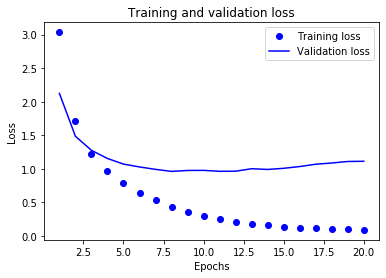

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

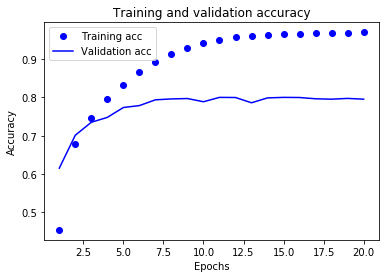

In [29]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [33]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [34]:
history = model.fit(x_train, y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
12/12 [==============================] - 1s 39ms/step - loss: 2.7665 - accuracy: 0.4907 - val_loss: 1.8783 - val_accuracy: 0.6553
Epoch 2/9
12/12 [==============================] - 0s 22ms/step - loss: 1.5546 - accuracy: 0.6830 - val_loss: 1.3879 - val_accuracy: 0.7036
Epoch 3/9
12/12 [==============================] - 0s 25ms/step - loss: 1.1354 - accuracy: 0.7580 - val_loss: 1.2042 - val_accuracy: 0.7384
Epoch 4/9
12/12 [==============================] - 0s 28ms/step - loss: 0.8904 - accuracy: 0.8118 - val_loss: 1.1023 - val_accuracy: 0.7579
Epoch 5/9
12/12 [==============================] - 0s 24ms/step - loss: 0.7095 - accuracy: 0.8545 - val_loss: 1.0251 - val_accuracy: 0.7814
Epoch 6/9
12/12 [==============================] - 0s 24ms/step - loss: 0.5730 - accuracy: 0.8868 - val_loss: 0.9754 - val_accuracy: 0.7894
Epoch 7/9
12/12 [==============================] - 0s 26ms/step - loss: 0.4617 - accuracy: 0.9083 - val_loss: 0.9710 - val_accuracy: 0.7857
Epoch 8/9
12/12 [===

In [35]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9884 - accuracy: 0.7907


[0.9883987307548523, 0.790739119052887]

In [36]:
predictions = model.predict(x_test)

In [37]:
np.argmax(predictions[0]), y_test[0]

(3,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))